# 4. Stitch outputs together
- Once you have fitted the weak, medium and dense diads, stitch them all together, and apply the Ne correction model

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import joblib
import DiadFit as pf
pf.__version__

'1.0.1'

In [2]:
# Load in settings, paths, file extensions etc. that you saved in step 1
meta_path, spectra_path, spectra_filetype, prefix, str_prefix, spectra_file_ext, meta_file_ext, TruPower=pf.get_settings()

## Load in specra, and combine

In [3]:
import os
df2=pf.merge_fit_files(path=os.getcwd())
df2.head()

,filename,Splitting,Split_σ,Diad1_Combofit_Cent,Diad1_cent_err,Diad1_Combofit_Height,Diad1_Voigt_Cent,Diad1_Voigt_Area,Diad1_Voigt_Sigma,Diad1_Residual,...,Diad1_Asym70,Diad1_Yuan2017_sym_factor,Diad1_Remigi2021_BSF,Diad2_Asym50,Diad2_Asym70,Diad2_Yuan2017_sym_factor,Diad2_Remigi2021_BSF,Diad1_PDF_Model,Diad2_PDF_Model,Standard
0,187-9-203a-MIA-49mw_CRR_DiadFit,103.001094,0.010078,1286.441330,0.008107,319.043667,1286.441330,336.149534,0.455651,3.879121,...,1.185792,0.160264,0.002856,1.236220,1.292683,0.208763,0.001846,PseudoVoigtModel,PseudoVoigtModel,No
1,187-9-203a-MIA,103.026686,0.012446,1286.429721,0.010336,118.708308,1286.429721,134.347481,0.475949,1.876980,...,1.047264,0.054222,0.008019,1.203320,1.266881,0.165435,0.004101,PseudoVoigtModel,PseudoVoigtModel,No
2,187-9-203a-MIC,102.765229,0.270601,1286.725788,0.269191,205.771644,1286.725788,1939.352051,3.000000,49.181862,...,3.499849,0.101911,0.029159,1.139738,1.184932,0.119173,0.003308,PseudoVoigtModel,PseudoVoigtModel,No
3,187-9-203b-MIA-49mw,103.099318,0.017015,1286.223345,0.015596,176.429965,1286.223345,214.900990,0.471596,3.721871,...,1.238095,0.157783,0.005346,1.077419,1.076531,0.071446,0.003145,PseudoVoigtModel,PseudoVoigtModel,No
4,187-9-203b-MIA-rep1,103.127889,0.017840,1286.206562,0.016573,87.090018,1286.206562,112.520331,0.545351,1.452217,...,1.102138,0.130602,0.012524,1.074675,1.069231,0.066640,0.005711,PseudoVoigtModel,PseudoVoigtModel,No


## First, get the metadata for this day

In [4]:
# Put the common string you can in all your Ne lines here
diad_meta=pf.get_files(path=meta_path,
file_ext=meta_file_ext, exclude_str=['Ne', 'NE', 'Si', 'nodiad', 'Ne', 'Cap','window','Video', 'nodiad','diad','Series','no_diad','diad','Series','unquant'],
 sort=True)
diad_meta[0]

'004 FG04-A1-4-start.txt'

## Now get all the important information out of the metadata files

In [5]:
# This will only work for WITEC - for other vendors, you might have to use the file datastamp. See the HORIBA example
meta=pf.stitch_metadata_in_loop_witec(path=meta_path, 
Allfiles=diad_meta, prefix=prefix, str_prefix=str_prefix,
trupower=TruPower)
meta.head()

100%|██████████| 112/112 [00:03<00:00, 28.24it/s]

Done


,filename,date,Month,Day,power (mW),Int_time (s),accumulations,Mag (X),duration,24hr_time,sec since midnight,Spectral Center
0,FG04-A1-4-start.txt,"August 22, 2024\n",August,22.0,6.078,45.0,5.0,50.0,"['0h', '3m', '46s']",10:53:53 AM\n,39233.0,1324.964
1,187-9-203a-MIA-49mw.txt,"August 22, 2024\n",August,22.0,49.159,30.0,1.0,50.0,"['0h', '0m', '32s']",11:05:20 AM\n,39920.0,1324.964
2,187-9-203a-MIA.txt,"August 22, 2024\n",August,22.0,10.169,60.0,4.0,50.0,"['0h', '4m', '1s']",11:17:51 AM\n,40671.0,1324.964
3,187-9-203a-MIC.txt,"August 22, 2024\n",August,22.0,11.978,60.0,4.0,50.0,"['0h', '4m', '1s']",11:40:46 AM\n,42046.0,1324.964
5,187-9-203a-MIC_demixed.txt,"August 22, 2024\n",August,22.0,11.978,60.0,4.0,50.0,"['0h', '4m', '1s']",11:40:46 AM\n,42046.0,1324.964


## Then get a simple file name you can stitch with the spectra

In [6]:
file_m=pf.extracting_filenames_generic(names=meta['filename'],
   file_ext=meta_file_ext)
# Checks they are all unique
file_m[0]

good job, no duplicate file names


'FG04-A1-4-start'

In [7]:
for i in range(len(file_m)):
    file_m[i] = file_m[i].replace("--Information", "")
file_m

array(['FG04-A1-4-start', '187-9-203a-MIA-49mw', '187-9-203a-MIA',
       '187-9-203a-MIC', '187-9-203a-MIC_demixed', 'crystalbond',
       '187-9-203b-MIA-49mw', '187-9-203b-MIA-rep1',
       '187-9-203b-MIA-rep2', '187-9-203b-MIA-rep3', '187-9-203b-FIA',
       '187-9-204-MIA-49mw', '187-9-204-MIA-rep1', '187-9-204-MIA-rep2',
       '187-9-204-MIA-rep3', '187-9-204-FIB', '187-9-204-FIC',
       '187-9-204-FIE', '187-9-204-FID', '187-9-204-MIB',
       '187-9-205-MIA-rep1', '187-9-205-MIA-rep2', '187-9-205-MIA-rep3',
       '187-9-205-MIA-20mw', '187-9-206-MIA-rep1', '187-9-206-MIA-rep2',
       '187-9-206-MIA-rep3', '187-9-207-MIA-rep1', '187-9-207-MIA-rep2',
       '187-9-207-MIA-rep3', '187-9-207-MIB-rep1', '187-9-207-MIB-rep2',
       '187-9-207-MIB-rep3', '187-9-208-MIA-rep1', '187-9-208-MIA-rep2',
       '187-9-208-MIA-rep3', '187-9-208-FIA', '187-9-208-FIB',
       '187-9-209-MIA-rep1', '187-9-209-MIA-rep2', '187-9-209-MIA-rep3',
       '187-9-209-FIA', '187-9-210-MIA-rep1', '1

## Now get filename from spectra into same form as metadata

In [8]:
# Remove these to get the pure file name
file_s=pf.extracting_filenames_generic(
    names=df2['filename'].reset_index(drop=True),
   file_ext=spectra_file_ext)

# Remove the cosmic rays, as doesnt have it in the metatdata
file_s = np.char.replace(file_s.astype(str), "_CRR_DiadFit", "")
print(file_s[0])

good job, no duplicate file names
187-9-203a-MIA-49mw


In [9]:
for i in range(len(file_s)):
    file_s[i] = file_s[i].replace("--Spec.Data 1", "")
file_s

array(['187-9-203a-MIA-49mw', '187-9-203a-MIA', '187-9-203a-MIC',
       '187-9-203b-MIA-49mw', '187-9-203b-MIA-rep1',
       '187-9-203b-MIA-rep2', '187-9-203b-MIA-rep3', '187-9-204-MIA-49mw',
       '187-9-204-MIA-rep1', '187-9-204-MIA-rep2', '187-9-204-MIA-rep3',
       '187-9-204-MIB', '187-9-205-MIA-rep1', '187-9-205-MIA-rep2',
       '187-9-205-MIA-rep3', '187-9-205-MIA-20mw', '187-9-206-MIA-rep1',
       '187-9-206-MIA-rep2', '187-9-206-MIA-rep3', '187-9-207-MIA-rep1',
       '187-9-207-MIA-rep2', '187-9-207-MIA-rep3', '187-9-207-MIB-rep1',
       '187-9-207-MIB-rep2', '187-9-207-MIB-rep3', '187-9-208-MIA-rep1',
       '187-9-208-MIA-rep2', '187-9-208-MIA-rep3', '187-9-208-FIB',
       '187-9-209-MIA-rep1', '187-9-209-MIA-rep2', '187-9-209-MIA-rep3',
       '187-9-209-FIA', '187-9-210-MIA-rep1', '187-9-210-MIA-rep3',
       '187-9-211-MIA-rep1', '187-9-211-MIA-rep2', '187-9-211-MIA-rep3',
       '187-9-212-MIA', '187-9-214-MIA-rep2', '187-9-203b-FIA',
       '187-9-204-FIB', '18

In [10]:
# Combining them together, if the form above matches, e.g. checking one doesnt have a suffix and the other one does

meta['filename']=file_m
df2['filename']=file_s
df_combo=pd.merge(df2, meta, on='filename').reset_index(drop=True)
df_combo.head()

,filename,Splitting,Split_σ,Diad1_Combofit_Cent,Diad1_cent_err,Diad1_Combofit_Height,Diad1_Voigt_Cent,Diad1_Voigt_Area,Diad1_Voigt_Sigma,Diad1_Residual,...,Month,Day,power (mW),Int_time (s),accumulations,Mag (X),duration,24hr_time,sec since midnight,Spectral Center
0,187-9-203a-MIA-49mw,103.001094,0.010078,1286.441330,0.008107,319.043667,1286.441330,336.149534,0.455651,3.879121,...,August,22.0,49.159,30.0,1.0,50.0,"['0h', '0m', '32s']",11:05:20 AM\n,39920.0,1324.964
1,187-9-203a-MIA,103.026686,0.012446,1286.429721,0.010336,118.708308,1286.429721,134.347481,0.475949,1.876980,...,August,22.0,10.169,60.0,4.0,50.0,"['0h', '4m', '1s']",11:17:51 AM\n,40671.0,1324.964
2,187-9-203a-MIC,102.765229,0.270601,1286.725788,0.269191,205.771644,1286.725788,1939.352051,3.000000,49.181862,...,August,22.0,11.978,60.0,4.0,50.0,"['0h', '4m', '1s']",11:40:46 AM\n,42046.0,1324.964
3,187-9-203b-MIA-49mw,103.099318,0.017015,1286.223345,0.015596,176.429965,1286.223345,214.900990,0.471596,3.721871,...,August,22.0,49.561,30.0,1.0,50.0,"['0h', '0m', '32s']",12:08:37 PM\n,43717.0,1324.964
4,187-9-203b-MIA-rep1,103.127889,0.017840,1286.206562,0.016573,87.090018,1286.206562,112.520331,0.545351,1.452217,...,August,22.0,5.986,60.0,4.0,50.0,"['0h', '4m', '2s']",12:17:59 PM\n,44279.0,1324.964


## If you have secondary phases, now is the time to merge those in

In [11]:
df_combo_sec_phase=pf.merge_in_carb_SO2(
df_combo=df_combo, file1_name='Carb_Peak_fits.xlsx', file2_name='SO2_Peak_fits.xlsx', 
prefix=prefix, str_prefix=str_prefix, file_ext=spectra_file_ext)
#df_combo_sec_phase.to_excel('FI_fitting_w_sec_phases.xlsx', index=False)

Made a df!
good job, no duplicate file names


## If you have SO2, now is the time to calculate the molar proportion of SO2

In [12]:
if 'Peak_Area_SO2' in df_combo_sec_phase:
    

        SO2_mol_ratio=pf.calculate_SO2_CO2_ratio(SO2_area=df_combo_sec_phase['Peak_Area_SO2'], 
        diad1_area=df_combo_sec_phase['Diad1_Voigt_Area'], diad2_area=df_combo_sec_phase['Diad2_Voigt_Area'], 
                SO2_cross_sec=5.3, diad1_cross_sec=0.89, diad2_cross_sec=1.4)
        

        df_combo_sec_phase['SO2_mol_ratio']=SO2_mol_ratio

## Now we calculate the density using the UC Berkeley Densimeter. 
- If you have your own densimeter, I am happy to add a function for it if you email me (penny_wieser@berkeley.edu)
- This particular function propagates the uncertainty on 1) The neon line correction model 2) the peak fits of the diads themselves 3) The densimeter. 

In [13]:
df=pf.calculate_density_ucb(df_combo=df_combo_sec_phase,
  Ne_pickle_str='Neon_corr_model.pkl',  temp='SupCrit', CI_split=0.67, CI_neon=0.67)
df.head()

6.24388065071412e-06


,filename,Density g/cm3,σ Density g/cm3,σ Density g/cm3 (from Ne+peakfit),σ Density g/cm3 (from densimeter),Corrected_Splitting,Corrected_Splitting_σ,Corrected_Splitting_σ_Ne,Corrected_Splitting_σ_peak_fit,power (mW),...,sec since midnight,Peak_Cent_Carb,Peak_Area_Carb,Peak_Height_Carb,Model_name,Carb_Diad_Ratio,time,preferred_values,lower_values,upper_values
0,187-9-203a-MIA-49mw,0.016093,0.005603,0.003993,0.003931,102.790871,0.010078,0.000647,0.010078,49.159,...,39920.0,NaN,NaN,NaN,NaN,NaN,39920.0,0.997959,0.997953,0.997965
1,187-9-203a-MIA,0.026194,0.006283,0.004928,0.003897,102.816361,0.012438,0.000643,0.012446,10.169,...,40671.0,NaN,NaN,NaN,NaN,NaN,40671.0,0.997959,0.997952,0.997965
2,187-9-203a-MIC,-0.077243,0.000000,0.000000,0.000000,102.555316,0.270049,0.000635,0.270601,11.978,...,42046.0,NaN,NaN,NaN,NaN,NaN,42046.0,0.997957,0.997951,0.997964
3,187-9-203b-MIA-49mw,0.054790,0.007745,0.006733,0.003829,102.888529,0.016991,0.000631,0.017015,49.561,...,43717.0,1093.23808,1072.783848,65.611927,Spline,1.987254,43717.0,0.997955,0.997949,0.997962
4,187-9-203b-MIA-rep1,0.066058,0.008023,0.007059,0.003813,102.916966,0.017814,0.000629,0.017840,5.986,...,44279.0,NaN,NaN,NaN,NaN,NaN,44279.0,0.997955,0.997949,0.997961


In [14]:
df=pf.calculate_density_ucb(df_combo=df_combo_sec_phase,
  Ne_pickle_str='Neon_corr_model.pkl',  temp='SupCrit', CI_split=0.67, CI_neon=0.67)
df.head()

6.24388065071412e-06


,filename,Density g/cm3,σ Density g/cm3,σ Density g/cm3 (from Ne+peakfit),σ Density g/cm3 (from densimeter),Corrected_Splitting,Corrected_Splitting_σ,Corrected_Splitting_σ_Ne,Corrected_Splitting_σ_peak_fit,power (mW),...,sec since midnight,Peak_Cent_Carb,Peak_Area_Carb,Peak_Height_Carb,Model_name,Carb_Diad_Ratio,time,preferred_values,lower_values,upper_values
0,187-9-203a-MIA-49mw,0.016093,0.005603,0.003993,0.003931,102.790871,0.010078,0.000647,0.010078,49.159,...,39920.0,NaN,NaN,NaN,NaN,NaN,39920.0,0.997959,0.997953,0.997965
1,187-9-203a-MIA,0.026194,0.006283,0.004928,0.003897,102.816361,0.012438,0.000643,0.012446,10.169,...,40671.0,NaN,NaN,NaN,NaN,NaN,40671.0,0.997959,0.997952,0.997965
2,187-9-203a-MIC,-0.077243,0.000000,0.000000,0.000000,102.555316,0.270049,0.000635,0.270601,11.978,...,42046.0,NaN,NaN,NaN,NaN,NaN,42046.0,0.997957,0.997951,0.997964
3,187-9-203b-MIA-49mw,0.054790,0.007745,0.006733,0.003829,102.888529,0.016991,0.000631,0.017015,49.561,...,43717.0,1093.23808,1072.783848,65.611927,Spline,1.987254,43717.0,0.997955,0.997949,0.997962
4,187-9-203b-MIA-rep1,0.066058,0.008023,0.007059,0.003813,102.916966,0.017814,0.000629,0.017840,5.986,...,44279.0,NaN,NaN,NaN,NaN,NaN,44279.0,0.997955,0.997949,0.997961


### This cell saves the merged together dataframe with the folder name and the date you fitted it

In [15]:

from datetime import date
today = date.today()
today_str = today.strftime("%Y-%m-%d")
sorted_df = df.sort_values('sec since midnight')
date=meta['date'].iloc[0].replace('\n', '')
name='Raman_session_'+date+'_fitted_'+today_str+'.xlsx'
print(name)
sorted_df.to_excel(name)

Raman_session_August 22, 2024_fitted_2024-08-23.xlsx


## This helps visualize the errors on each spectra 

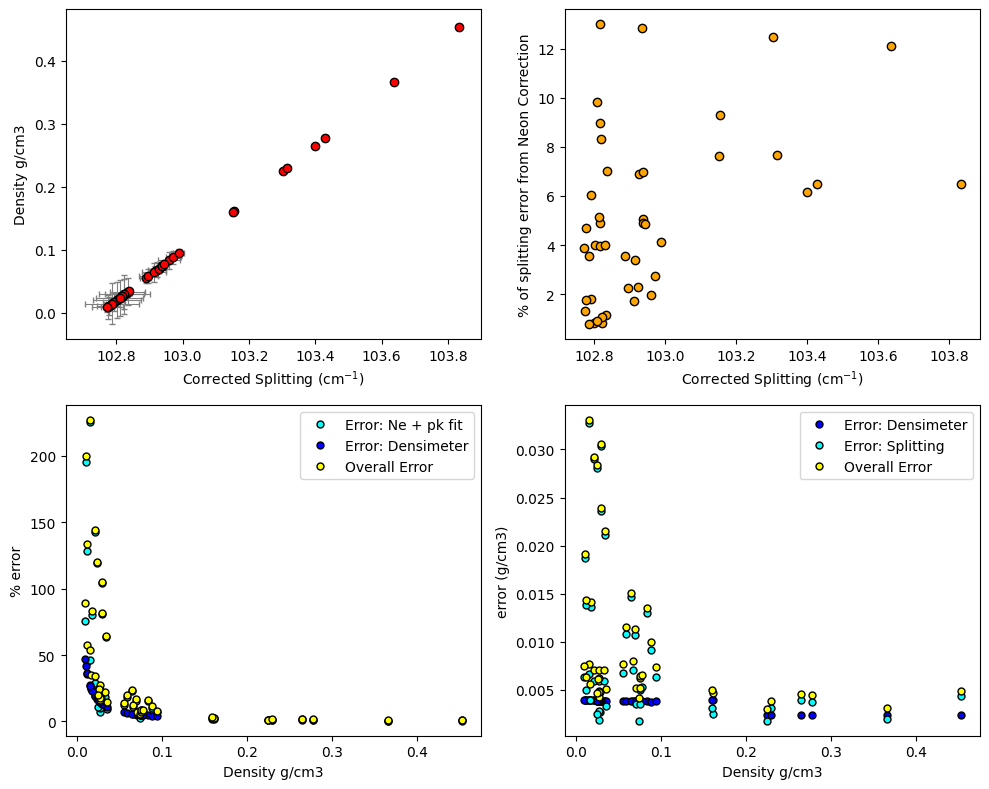

In [16]:

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(10,8))
df=sorted_df.loc[(sorted_df['Density g/cm3']>0) & (sorted_df['Standard']!='Yes')]

ax1.errorbar(df['Corrected_Splitting'], df['Density g/cm3'],
xerr=df['Corrected_Splitting_σ'], yerr=df['σ Density g/cm3'],
fmt='o', ecolor='grey', elinewidth=0.8, mfc='red', ms=6, mec='k', capsize=2)
ax1.set_xlabel('Corrected Splitting (cm$^{-1}$)')
ax1.set_ylabel('Density g/cm3')

ax2.plot(df['Corrected_Splitting'], 
100*df['Corrected_Splitting_σ_Ne']/(df['Corrected_Splitting_σ_Ne']+df['Corrected_Splitting_σ_peak_fit']),
 'ok', mfc='orange')
ax2.set_ylabel('% of splitting error from Neon Correction')
ax2.set_xlabel('Corrected Splitting (cm$^{-1}$)')
ax3.plot(df['Density g/cm3'], 100*df['σ Density g/cm3 (from Ne+peakfit)']/df['Density g/cm3'], 
'ok', mfc='cyan', ms=5, label='Error: Ne + pk fit')


ax3.plot(df['Density g/cm3'], 100*df['σ Density g/cm3 (from densimeter)']/df['Density g/cm3'], 
'ok', mfc='blue', ms=5, label='Error: Densimeter')

ax3.plot(df['Density g/cm3'], 100*df['σ Density g/cm3']/df['Density g/cm3'], 
'ok', mfc='yellow', ms=5, label='Overall Error')
ax3.set_ylabel('% error')
ax3.set_xlabel('Density g/cm3')
ax3.legend()

ax4.plot(df['Density g/cm3'], df['σ Density g/cm3 (from densimeter)'], 
'ok', mfc='blue', ms=5, label='Error: Densimeter')
ax4.plot(df['Density g/cm3'], df['σ Density g/cm3 (from Ne+peakfit)'], 
'ok', mfc='cyan', ms=5, label='Error: Splitting')
ax4.plot(df['Density g/cm3'], df['σ Density g/cm3'], 
'ok', mfc='yellow', ms=5, label='Overall Error')
ax4.set_ylabel('error (g/cm3)')
ax4.set_xlabel('Density g/cm3')
ax4.legend()

fig.tight_layout()

In [17]:
df

,filename,Density g/cm3,σ Density g/cm3,σ Density g/cm3 (from Ne+peakfit),σ Density g/cm3 (from densimeter),Corrected_Splitting,Corrected_Splitting_σ,Corrected_Splitting_σ_Ne,Corrected_Splitting_σ_peak_fit,power (mW),...,sec since midnight,Peak_Cent_Carb,Peak_Area_Carb,Peak_Height_Carb,Model_name,Carb_Diad_Ratio,time,preferred_values,lower_values,upper_values
0,187-9-203a-MIA-49mw,0.016093,0.005603,0.003993,0.003931,102.790871,0.010078,0.000647,0.010078,49.159,...,39920.0,NaN,NaN,NaN,NaN,NaN,39920.0,0.997959,0.997953,0.997965
1,187-9-203a-MIA,0.026194,0.006283,0.004928,0.003897,102.816361,0.012438,0.000643,0.012446,10.169,...,40671.0,NaN,NaN,NaN,NaN,NaN,40671.0,0.997959,0.997952,0.997965
3,187-9-203b-MIA-49mw,0.054790,0.007745,0.006733,0.003829,102.888529,0.016991,0.000631,0.017015,49.561,...,43717.0,1093.238080,1072.783848,65.611927,Spline,1.987254,43717.0,0.997955,0.997949,0.997962
4,187-9-203b-MIA-rep1,0.066058,0.008023,0.007059,0.003813,102.916966,0.017814,0.000629,0.017840,5.986,...,44279.0,NaN,NaN,NaN,NaN,NaN,44279.0,0.997955,0.997949,0.997961
5,187-9-203b-MIA-rep2,0.068568,0.011334,0.010674,0.003810,102.923303,0.026938,0.000628,0.026986,5.989,...,44569.0,1095.413038,140.250491,21.326107,Spline,0.852648,44569.0,0.997954,0.997948,0.997960
6,187-9-203b-MIA-rep3,0.058098,0.011511,0.010858,0.003823,102.896879,0.027402,0.000627,0.027451,5.999,...,44925.0,1095.413038,466.672496,34.114711,Spline,2.953747,44925.0,0.997954,0.997948,0.997960
40,187-9-203b-FIA,0.365917,0.003087,0.002003,0.002349,103.636663,0.004594,0.000629,0.004560,5.986,...,45901.0,NaN,NaN,NaN,NaN,NaN,45901.0,0.997952,0.997946,0.997959
7,187-9-204-MIA-49mw,0.011109,0.006362,0.004988,0.003949,102.778291,0.012588,0.000623,0.012599,49.249,...,46626.0,NaN,NaN,NaN,NaN,NaN,46626.0,0.997951,0.997945,0.997957
8,187-9-204-MIA-rep1,0.020666,0.007092,0.005914,0.003915,102.802411,0.014925,0.000622,0.014943,10.008,...,47098.0,NaN,NaN,NaN,NaN,NaN,47098.0,0.997951,0.997945,0.997957
9,187-9-204-MIA-rep2,0.026153,0.007105,0.005941,0.003897,102.816257,0.014992,0.000622,0.015010,10.008,...,47538.0,NaN,NaN,NaN,NaN,NaN,47538.0,0.997950,0.997944,0.997956


In [18]:

df[df['filename'].str.contains("MI")]

,filename,Density g/cm3,σ Density g/cm3,σ Density g/cm3 (from Ne+peakfit),σ Density g/cm3 (from densimeter),Corrected_Splitting,Corrected_Splitting_σ,Corrected_Splitting_σ_Ne,Corrected_Splitting_σ_peak_fit,power (mW),...,sec since midnight,Peak_Cent_Carb,Peak_Area_Carb,Peak_Height_Carb,Model_name,Carb_Diad_Ratio,time,preferred_values,lower_values,upper_values
0,187-9-203a-MIA-49mw,0.016093,0.005603,0.003993,0.003931,102.790871,0.010078,0.000647,0.010078,49.159,...,39920.0,NaN,NaN,NaN,NaN,NaN,39920.0,0.997959,0.997953,0.997965
1,187-9-203a-MIA,0.026194,0.006283,0.004928,0.003897,102.816361,0.012438,0.000643,0.012446,10.169,...,40671.0,NaN,NaN,NaN,NaN,NaN,40671.0,0.997959,0.997952,0.997965
3,187-9-203b-MIA-49mw,0.054790,0.007745,0.006733,0.003829,102.888529,0.016991,0.000631,0.017015,49.561,...,43717.0,1093.238080,1072.783848,65.611927,Spline,1.987254,43717.0,0.997955,0.997949,0.997962
4,187-9-203b-MIA-rep1,0.066058,0.008023,0.007059,0.003813,102.916966,0.017814,0.000629,0.017840,5.986,...,44279.0,NaN,NaN,NaN,NaN,NaN,44279.0,0.997955,0.997949,0.997961
5,187-9-203b-MIA-rep2,0.068568,0.011334,0.010674,0.003810,102.923303,0.026938,0.000628,0.026986,5.989,...,44569.0,1095.413038,140.250491,21.326107,Spline,0.852648,44569.0,0.997954,0.997948,0.997960
6,187-9-203b-MIA-rep3,0.058098,0.011511,0.010858,0.003823,102.896879,0.027402,0.000627,0.027451,5.999,...,44925.0,1095.413038,466.672496,34.114711,Spline,2.953747,44925.0,0.997954,0.997948,0.997960
7,187-9-204-MIA-49mw,0.011109,0.006362,0.004988,0.003949,102.778291,0.012588,0.000623,0.012599,49.249,...,46626.0,NaN,NaN,NaN,NaN,NaN,46626.0,0.997951,0.997945,0.997957
8,187-9-204-MIA-rep1,0.020666,0.007092,0.005914,0.003915,102.802411,0.014925,0.000622,0.014943,10.008,...,47098.0,NaN,NaN,NaN,NaN,NaN,47098.0,0.997951,0.997945,0.997957
9,187-9-204-MIA-rep2,0.026153,0.007105,0.005941,0.003897,102.816257,0.014992,0.000622,0.015010,10.008,...,47538.0,NaN,NaN,NaN,NaN,NaN,47538.0,0.997950,0.997944,0.997956
10,187-9-204-MIA-rep3,0.014410,0.007746,0.006671,0.003937,102.786622,0.016835,0.000621,0.016858,10.005,...,47821.0,NaN,NaN,NaN,NaN,NaN,47821.0,0.997949,0.997943,0.997955


## lets look at standards


Text(0, 0.5, 'Density g/cm3')

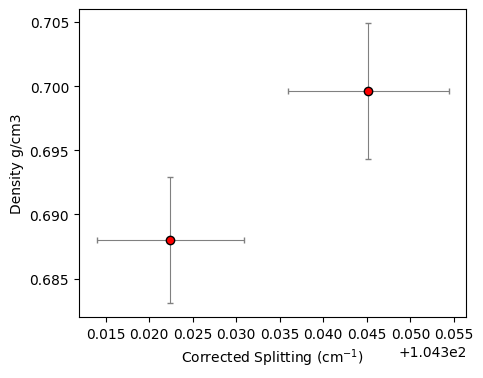

In [19]:
fig, (ax1) = plt.subplots(1, 1, figsize=(5,4))
df=sorted_df.loc[ sorted_df['Standard']=='Yes']
ax1.errorbar(df['Corrected_Splitting'], df['Density g/cm3'],
xerr=df['Corrected_Splitting_σ'], yerr=df['σ Density g/cm3'],
fmt='o', ecolor='grey', elinewidth=0.8, mfc='red', ms=6, mec='k', capsize=2)
ax1.set_xlabel('Corrected Splitting (cm$^{-1}$)')
ax1.set_ylabel('Density g/cm3')

In [20]:
df.to_clipboard(excel=True,index=False)

## If you were analysing fluid inclusions, lets calculate their pressures
- This bit isn't valid for melt inclusion vapour bubbles. 

Text(0, 0.5, '# of FI')

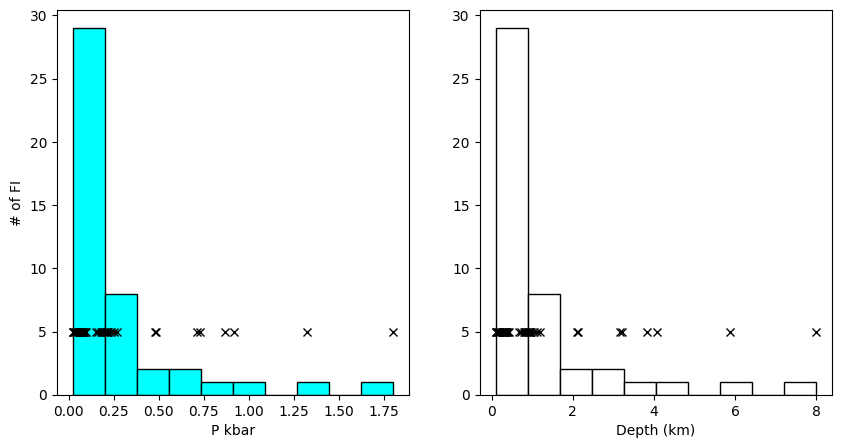

In [21]:
# Calculate pressure with a temperature estimate
Temp_C=1150
df=sorted_df.loc[(sorted_df['Density g/cm3']>0) & (sorted_df['Standard']!='Yes')]

Pressure_SW96=pf.calculate_P_for_rho_T(T_K=Temp_C+273.15,
                CO2_dens_gcm3=df['Density g/cm3'],
                 EOS='SW96')
# Calculate depth from a crustal density assumption
Depth=pf.convert_pressure_to_depth(P_kbar=Pressure_SW96['P_kbar'], 
                crust_dens_kgm3=2300)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
ax1.hist(Pressure_SW96['P_kbar'], ec='k', fc='cyan', bins=10)
ax1.plot(Pressure_SW96['P_kbar'], Pressure_SW96['P_kbar']*0+5, 'xk')
ax2.plot(Depth, Pressure_SW96['P_kbar']*0+5, 'xk')
ax2.hist(Depth, ec='k', fc='white', bins=10)
ax1.set_xlabel('P kbar')
ax2.set_xlabel('Depth (km)')
ax1.set_ylabel('# of FI')